# Logistic Regression

**Group members: Yifeng Lin(Yifeng will finish assignments individually before final project), Yuan Zheng and Ziyang Guo**

## Introduction:  
The insurance industry always wants to broaden its relationships with existing customers. In this assignment, we will help the insurance company to use the output of such a logistic regression model in an attempt to improve its customer retention and sales practices base on the dataset we have. The dataset is comprised of more than 14,000 observations of 1 response variable and 14 explanatory variables.

## Data Summary:  
    1.ID            Unique customer identifier  
    2.TRAGET        Indicator of buying the new product (0 = no, 1= yes)  
    3.Loyalty       Loyalty level, from low to high (0 to 3), 99 = unclassified
    4.Age           Age in years
    5.City          Unique code per city
    6.Age_p         Age of partner in years  
    7.LOR           Length of relationship in years  
    8.LOR_m         Length of relationship in months
    9.Prod_A        Bought Product A (0=no, 1=yes)  
    10.Type_A       Type of product A  
    11.Turnover_A   Amount of money spent on Product A  
    12.Prod_B       Bought Product B (0=no, 1=yes)  
    13.Type_B       Type of product B  
    14.Turnover_B   Amount of money spent on Product B  
    15.Contract     Type of contract

In [120]:
# load the pandas & numpy libraries and matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [121]:
data = pd.read_csv('https://raw.githubusercontent.com/Destiny-G1997/DAV-6150/main/M7_Data.csv')
data.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


## Exploratory Data Analysis

In [122]:
data.shape

(14016, 15)

In [123]:
data.dtypes

TARGET         object
loyalty         int64
ID              int64
age             int64
city            int64
LOR             int64
prod_A          int64
type_A          int64
type_B          int64
prod_B          int64
turnover_A    float64
turnover_B    float64
contract        int64
age_P           int64
lor_M           int64
dtype: object

In [124]:
# replace Y to 1 and replace N to 0
data['TARGET'] = data['TARGET'].replace("Y",1)
data['TARGET'] = data['TARGET'].replace("N",0)

In [125]:
data.dtypes

TARGET          int64
loyalty         int64
ID              int64
age             int64
city            int64
LOR             int64
prod_A          int64
type_A          int64
type_B          int64
prod_B          int64
turnover_A    float64
turnover_B    float64
contract        int64
age_P           int64
lor_M           int64
dtype: object

In [126]:
data.groupby('TARGET').mean()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
TARGET,,,,,,,,,,,,,,
0,39.791625,8366.446750,33.027125,-747.257125,1.081375,0.673000,2.025000,2.411625,0.74475,360.368141,371.263176,2.0,33.027125,15.976500
1,64.464428,76643.175864,39.680519,-662.669548,0.720080,0.348737,1.053191,1.263630,0.40625,404.152250,271.932769,2.0,39.680519,11.640957


We can see that the people who are older will prefer to buy the new insurance product. As for the 'LOR' and 'lor_n', we can know that if you spent less time in this relationship, you might be more likely to buy the new product.

In [127]:
#check if there are none values.
data.isnull().sum()

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

We need to set up two groups to separate categorical data and numerical data

In [128]:
data_num = data[['age','age_P','LOR','lor_M','turnover_A','turnover_B']]

In [129]:
data_cat= data[['loyalty','city','prod_A','type_A','prod_B','type_B','TARGET']]

In [130]:
# turn the name of columns into list
column_num=data_num.columns.to_list()
column_cat=data_cat.columns.to_list()

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

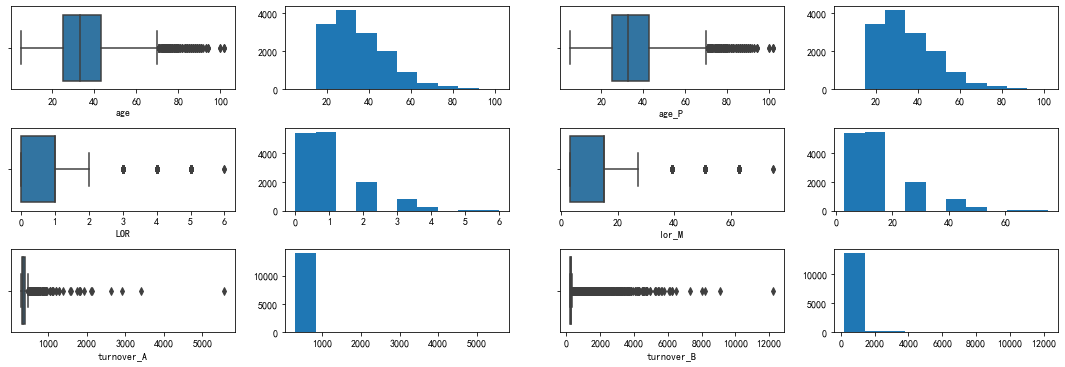

In [131]:
#show histogram and boxplot of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(6):
    n=2*i
    plt.subplot(12,4,n+1)
    sns.boxplot(data_num[column_num[i]])
    plt.subplot(12,4,n+2)
    plt.hist(data_num[column_num[i]])
    
plt.tight_layout()

According to the above charts, we can see the 'turnover_A' and 'turnover_B' have a lot of outliers, so we need to do the box-cox to normalize them. The age,age_P are Right-skewed Distribution observed, they all have right outliers.

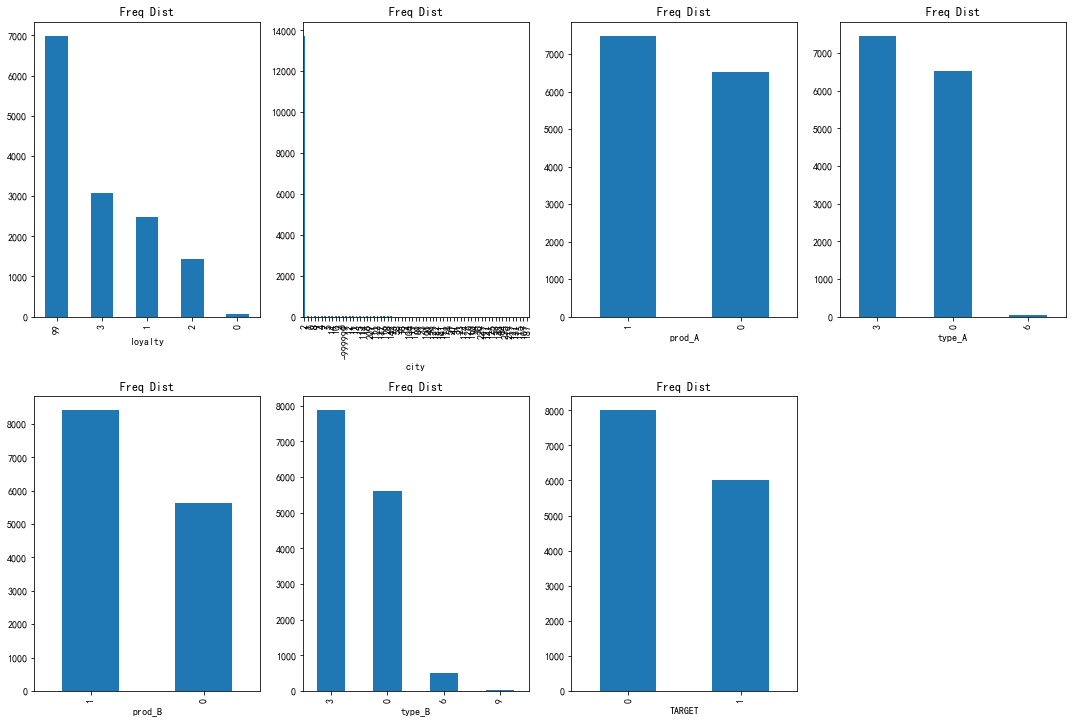

In [132]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(len(column_cat)):
    plt.subplot(3,4,i+1)
    data_cat[column_cat[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat[i])
plt.tight_layout()

- In the chart of 'loyalty', the '99' appears mostly followed by '3', '1', and '2', '0' appears the lowest number of times.
- In the prod_A, there are nearly 7500 people who have bought product A and there are about 6500 people who have not.
- In the type_A, there are nearly 7470 people have bought the type '3', and only 30 people bought the type '6'.
- In the prod_B, there are nearly 8400 people have bought product B and there are about 5600 people who have not.
- In the type_B, type 3 appears the most number, and type 9 appears the least number.
- In the TARGET, we find that there are nearly 6000 people have bought the new product and other 8000 have not.
- In the city, most cities gathered at the '2'.


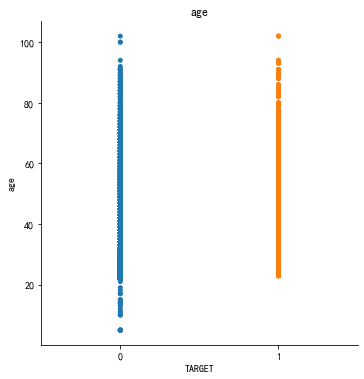

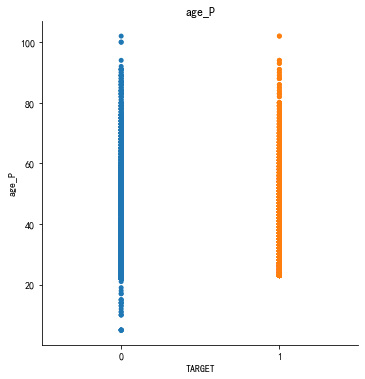

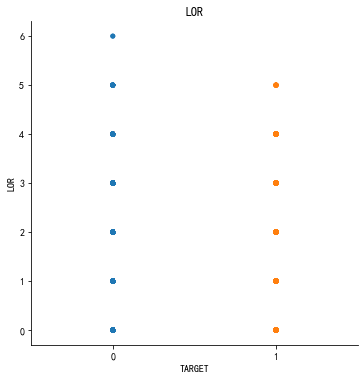

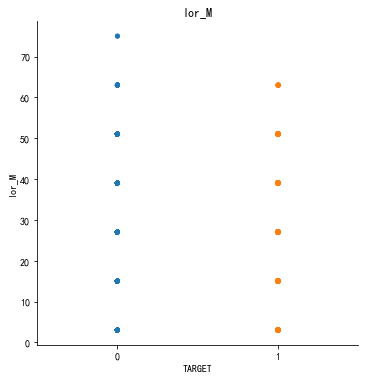

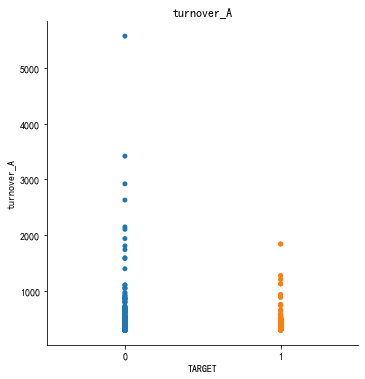

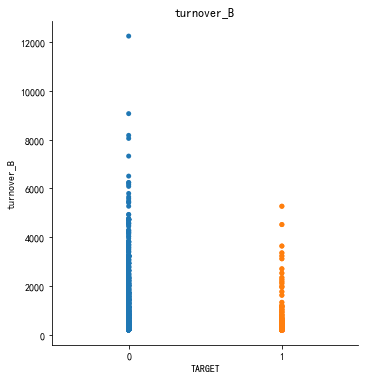

In [133]:
#show the catplot between numercial attributes and response variable
%matplotlib inline
for i in range(len(column_num)):  
    ax=sns.catplot(x="TARGET",y=column_num[i],jitter=False, data=data)
    plt.title(column_num[i])
    plt.show()

According to the above catplot, we can see the relationship between numerical attributes and response variable can be:
-  In the 'age' and 'age_P' table we can see some teenagers under 20 years old will not buy a new insurance product.
-  In 'Lor' and 'lor_m' we can see there are some people who are not willing to buy products for long time.
-  Comparing 'turnover_A' and 'turnover_B', we can see that the people who have spent more money on product B will not be willing to buy new product

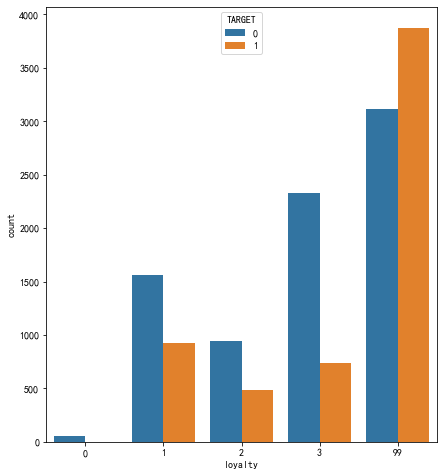

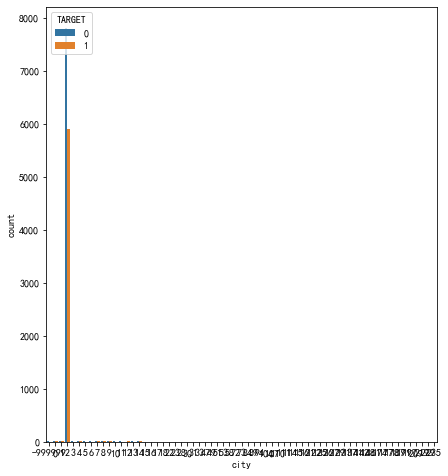

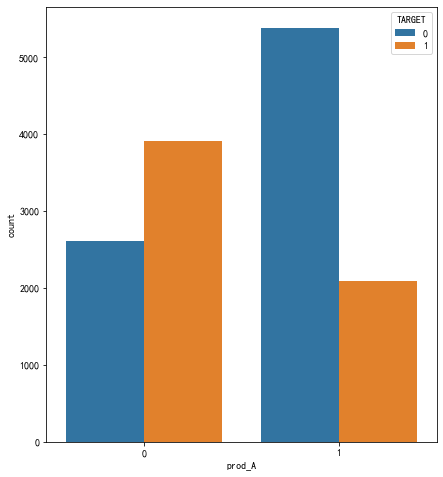

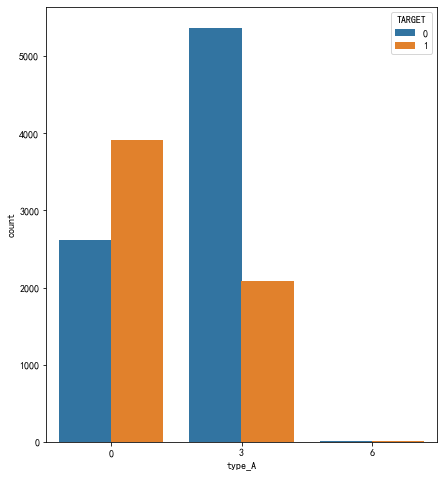

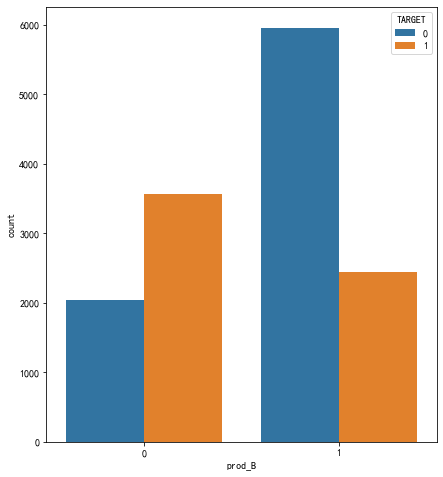

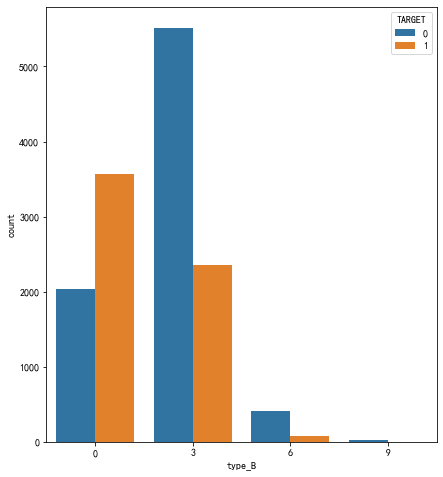

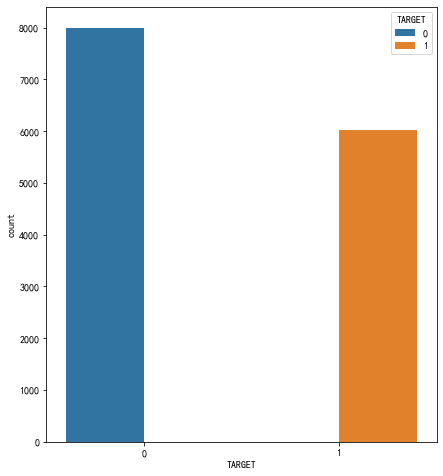

In [134]:
#show the countplot between categorical attributes and response variable
for col in column_cat:
    plt.figure(figsize=(7,8))
    sns.countplot(x=col,hue='TARGET',data=data_cat)
    

According to the above countplot, we may get the below conclusion:
- In the loyalty table, we find that most people's level is unclassified and they are willing to buy the new product, there are more customers with loyalty levels from 1 to 3 who are not willing to buy the new product.
- In the city table, we find that most people gathered at city2 and there are more people who don't want to buy the new product.
- In the prod_A table, we find that people who didn't buy product A will prefer to buy the new product. As for the people who have bought product A show less interest in the new product.
- In the prod_B table, we find that people who didn't buy product B will prefer to buy the new product. As for the people who have bought product B show less interest in the new product.
- In the type_A and type_B table we find that people who have chosen type 0 will prefer to buy the new product. As for the people who have bought type3 show less interest in the new product.

In [135]:
data_num.corr()

,age,age_P,LOR,lor_M,turnover_A,turnover_B
age,1.000000,1.000000,0.089640,0.089640,0.135887,0.251625
age_P,1.000000,1.000000,0.089640,0.089640,0.135887,0.251625
LOR,0.089640,0.089640,1.000000,1.000000,0.009987,0.158571
lor_M,0.089640,0.089640,1.000000,1.000000,0.009987,0.158571
turnover_A,0.135887,0.135887,0.009987,0.009987,1.000000,0.128613
turnover_B,0.251625,0.251625,0.158571,0.158571,0.128613,1.000000


According to the pearson's correlation matrix, we found the age and age_P, LOR and lor_M are highly correlated,

## Data Preparation

For data preparation, we transfer the 'TARGET' to dummy variable. And we will apply box cox function to finish normalization for 'turnover A' and 'turnover B'. If there are any missing values, we will apply KNN the fill missing values. According to the correlation result, we can see that the 'age' and 'age_P', and 'LOR' and 'lor_M' have very high correlation. So we dropped 'lor_M' and 'age_P' to reduce dimensions.

In [136]:
data.duplicated(keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
14011     True
14012     True
14013     True
14014     True
14015     True
Length: 14016, dtype: bool

In [137]:
data1= data.drop_duplicates(keep='first',inplace=False)

In [138]:
data1.shape

(11008, 15)

In [139]:
# Load boxcox function from scipy.stats
from scipy.stats import boxcox
from scipy import stats
data1 = data1.drop(['age_P', 'lor_M'], axis=1) 
data1.describe()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract
count,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.0
mean,0.273256,46.533612,27023.459938,34.845203,-724.143078,0.982649,0.584393,1.759448,2.097929,0.652253,372.332403,344.120565,2.0
std,0.445651,48.292402,38576.841141,13.032781,26949.664365,0.939415,0.492849,1.490133,1.671441,0.476277,96.685932,524.372413,0.0
min,0.000000,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0
25%,0.000000,2.000000,5480.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,332.229899,218.302029,2.0
50%,0.000000,3.000000,11025.500000,31.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,361.930298,235.025216,2.0
75%,1.000000,99.000000,16632.250000,42.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,391.567662,253.759401,2.0
max,1.000000,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0


In [140]:
# using boxcox to deal with some outliers and finish normalization
x1 = data1.turnover_A
y1, fixed_x1 = stats.boxcox(x1)
data1['turnover_A'] = pd.DataFrame(y1)

x2 = data1.turnover_B
y2, fixed_x2 = stats.boxcox(x2)
data1['turnover_B'] = pd.DataFrame(y2)

data1

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract
0,1,99,77,66,2,0,0,0,0,0,0.375512,0.330556,2
1,1,1,159,45,2,3,1,3,3,1,0.375512,0.330556,2
2,1,1,220,42,2,2,1,3,6,1,0.375512,0.330556,2
3,1,99,303,31,2,0,0,0,0,0,0.375512,0.330556,2
4,1,99,306,62,2,0,0,0,0,0,0.375512,0.330556,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,0,1,16793,33,2,2,1,3,3,1,0.375512,0.330556,2
11004,0,99,16794,23,2,0,0,0,0,0,0.375512,0.330556,2
11005,0,1,16798,23,2,2,1,3,3,1,0.375512,0.330556,2
11006,0,99,16800,32,2,1,1,3,3,1,0.375512,0.330556,2


For nominal categorical attributes that we choose to use in our model, we use the get_dummies function to turn those attributes into dummy variables.

In [141]:
data1['city']=data['city'].apply(lambda x:'2' if x==2 else 'other')

In [142]:
# get NOMINAL categorical attributes into dummy variables
data1 = pd.get_dummies(data1,columns = ['type_B'], prefix = ['type_B'], prefix_sep = '_', dummy_na = False, drop_first = False)
data1 = pd.get_dummies(data1,columns = ['city'], prefix = ['city'], prefix_sep = '_', dummy_na = False, drop_first = False)
data1 = pd.get_dummies(data1,columns = ['type_A'], prefix = ['type_A'], prefix_sep = '_', dummy_na = False, drop_first = False)

In [143]:
data1

,TARGET,loyalty,ID,age,LOR,prod_A,prod_B,turnover_A,turnover_B,contract,type_B_0,type_B_3,type_B_6,type_B_9,city_2,city_other,type_A_0,type_A_3,type_A_6
0,1,99,77,66,0,0,0,0.375512,0.330556,2,1,0,0,0,1,0,1,0,0
1,1,1,159,45,3,1,1,0.375512,0.330556,2,0,1,0,0,1,0,0,1,0
2,1,1,220,42,2,1,1,0.375512,0.330556,2,0,0,1,0,1,0,0,1,0
3,1,99,303,31,0,0,0,0.375512,0.330556,2,1,0,0,0,1,0,1,0,0
4,1,99,306,62,0,0,0,0.375512,0.330556,2,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,0,1,16793,33,2,1,1,0.375512,0.330556,2,0,1,0,0,1,0,0,1,0
11004,0,99,16794,23,0,0,0,0.375512,0.330556,2,1,0,0,0,1,0,1,0,0
11005,0,1,16798,23,2,1,1,0.375512,0.330556,2,0,1,0,0,1,0,0,1,0
11006,0,99,16800,32,1,1,1,0.375512,0.330556,2,0,1,0,0,1,0,0,1,0


## Prepped Data Review

After data preparation, we need to rerun EDA and to see the change

In [144]:
#seperate categorical data and numercial data
data1_num = data1[['age','turnover_A','turnover_B','LOR']]
data1_cat= data1[['loyalty','city_2','city_other','prod_A','type_A_0','type_A_3','type_A_6','prod_B','type_B_0','type_B_3','type_B_6','type_B_9','TARGET']]

In [145]:
# turn the name of columns into list
column_num=data1_num.columns.to_list()
column_cat=data1_cat.columns.to_list()

In [146]:
len(data1_cat)

11008

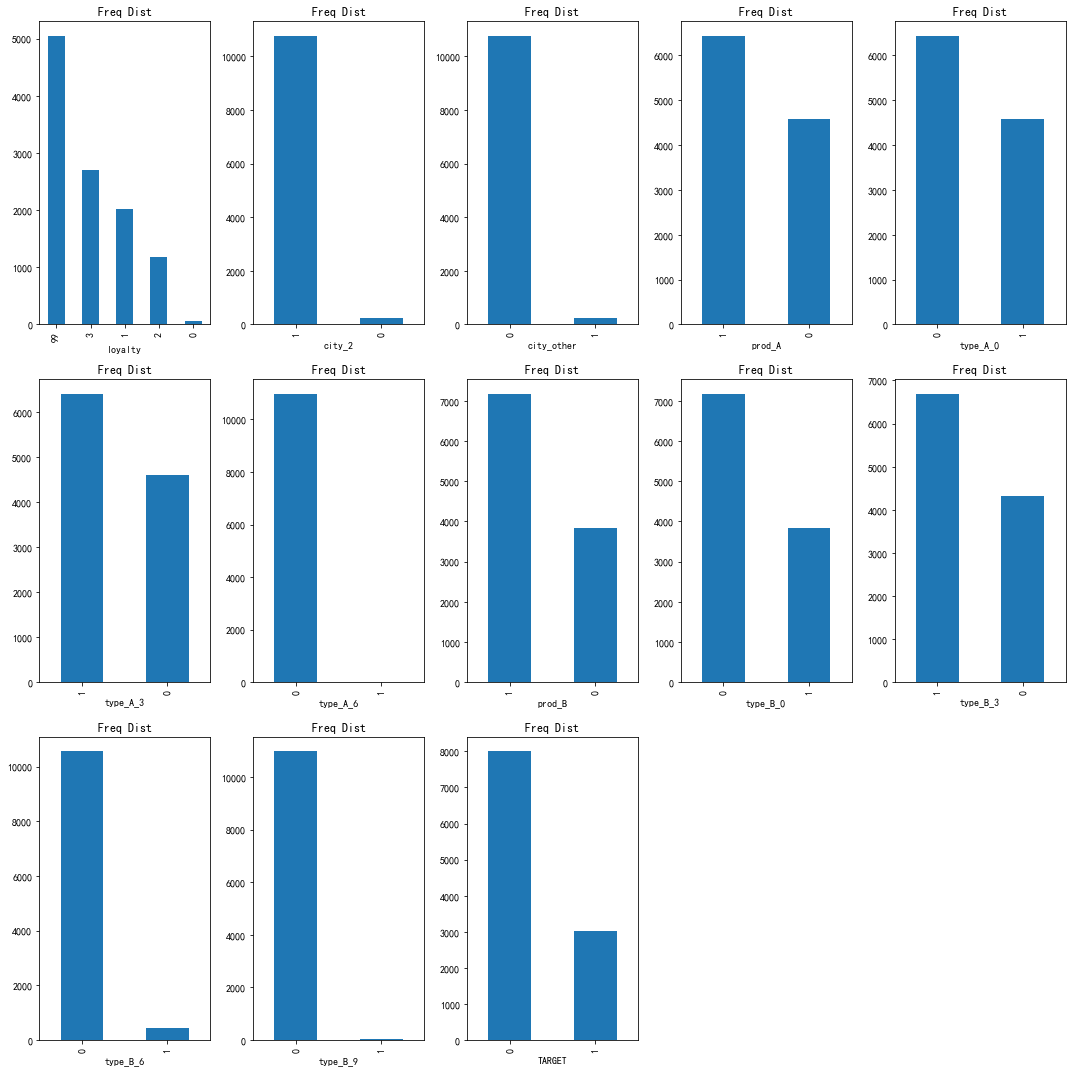

In [147]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(len(column_cat)):
    plt.subplot(3,5,i+1)
    data1_cat[column_cat[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat[i])
plt.tight_layout()

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass t

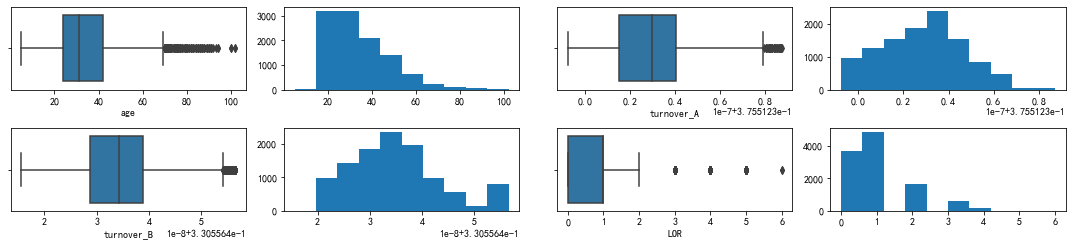

In [148]:
#show histogram and aboxplot of each attributes
fig=plt.figure(figsize=(15,20))
for i in range(len(column_num)):
    n=2*i
    plt.subplot(12,4,n+1)
    sns.boxplot(data1[column_num[i]])
    plt.subplot(12,4,n+2)
    plt.hist(data1[column_num[i]])
    
plt.tight_layout()

After re-EDA, we can see that there are fewer outliers in 'turnover_A' and 'turnover_B' than before. We decide to set 2 groups/models based on the attributes we have right now for regression modeling afterward. According to the domain knowledge we have, we set out the first group including attributes that are relevant to product A, age in years, and indicator of buying the new product (0 = no, 1= yes). The second model includes attributes that are relevant with product B, age in years, and indicator of buying the new product (0 = no, 1= yes).   
Model 1: prod_A, type_A, turnover_A, age, TARGET.  
Model 2: prod_B, type_B, turnover_B, age, TARGET.  

## KNN and SVM Modeling

**KNN Model 1**

In [149]:
# load the KNeighborsClassifier() function from sklearn's 'neighbors' sub-library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X1 = data1[['prod_A','type_A_0','type_A_3','type_A_6','turnover_A', 'age']].copy()
Y1 = data1.TARGET

In [150]:
# finish the train test split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.2, random_state = 12)

In [151]:
# check the shape of the training dataset
X1_train.shape, Y1_train.shape

((8806, 6), (8806,))

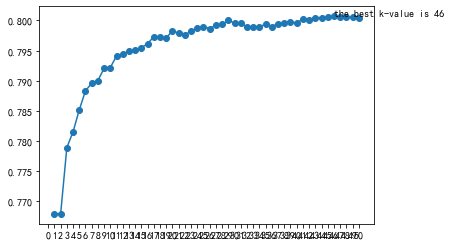

In [152]:
from sklearn import model_selection
# make line chart and scatter plot 
# Use the 10-fold cross-validation method to compare the prediction accuracy of the KNN model under each k value
from sklearn import neighbors
import matplotlib.pyplot as plt
def KNN_valuechoise(X_tain, y_train, K_num):
    K = np.arange(1,K_num+1)
    length = len(K)
    accuracy = []
    for k in K:    
        cv_result = model_selection.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors = int(k), weights = 'distance'), 
                                                    X1_train, Y1_train, cv = 10, scoring='accuracy')
        accuracy.append(cv_result.mean())    
    arg_max = np.array(accuracy).argmax() 
    plt.plot(K, accuracy) 
    plt.scatter(K, accuracy) 
    plt.text(K[arg_max], accuracy[arg_max], 'the best k-value is %s' %int(K[arg_max]))
    plt.xticks(np.arange(K_num+1), np.arange(K_num+1)) 
    plt.show()
    
KNN_valuechoise(X1_train, Y1_train, 50)

According to the process of valuing the best k-value, we are going to use '46' as our value of n_neighbors for KNN model1

In [153]:
#Train the model
KNN_Classifier1 = KNeighborsClassifier(n_neighbors = 46, p = 2,metric = 'minkowski')
KNN_Classifier1.fit(X1_train, Y1_train)

KNeighborsClassifier(n_neighbors=46)

In [154]:
#show the accuracy score of this model
KNN_Classifier1.score(X1_train, Y1_train)

0.8000227117874177

The KNN model 1 has an accuracy score of 80.00%

**KNN Model 2**

In [155]:
X2 = data1[['prod_B','type_B_0','type_B_3','type_B_6','type_B_9','turnover_B', 'age']].copy()
Y2 = data1.TARGET

In [156]:
# finish the train test split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.2, random_state = 12)

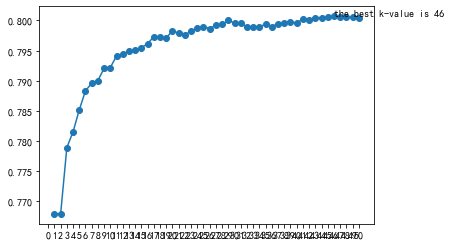

In [157]:
KNN_valuechoise(X2_train, Y2_train, 50)

According to the process of valuing the best k-value, we are going to use '46' as our value of n_neighbors for KNN model2

In [159]:
#Train the model
KNN_Classifier2 = KNeighborsClassifier(n_neighbors = 46, p = 2,metric = 'minkowski')
KNN_Classifier2.fit(X2_train, Y2_train)

KNeighborsClassifier(n_neighbors=46)

In [160]:
#show the accuracy score of this model
KNN_Classifier2.score(X2_train, Y2_train)

0.8047921871451283

The KNN model 2 has an accuracy score of 80.48%.

**SVM Model 1**

Due to our response variable being a categorical attribute, so we use the rbf() kernel in Support Vector Machines.

In [161]:
## load the SVC() function from sklearn's 'svm' sub-library
from sklearn.svm import SVC

In [162]:
#Train the model
clf1 = SVC(kernel = 'rbf')
clf1.fit(X1_train,Y1_train)

SVC()

In [163]:
#show the accuracy score of this model
clf1.score(X1_train,Y1_train)

0.7255280490574608

The SVM Model 1 has an accuracy score of 72.55%.

**SVM Model 2**

In [164]:
#Train the model
clf2 = SVC(kernel = 'rbf')
clf2.fit(X2_train,Y2_train)

SVC()

In [165]:
#show the accuracy score of this model
clf2.score(X2_train,Y2_train)

0.7684533272768567

The SVM Model 2 has an accuracy score of 76.85%.

## Select Models

According to the accuracy scores above, we can see the KNN is more accurate than SVM. We will compare the KNN models with model 2 with logistic regression in the last assignment which is the best model we selected from the last assignment.

In [166]:
# generate evaluation metrics
from sklearn import metrics 

In [167]:
# predict class labels for the test set
predictedKNN1 = KNN_Classifier1.predict(X1_test)
predictedKNN1

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [168]:
# show the class probabilities
probsKNN1 = KNN_Classifier1.predict_proba(X1_test)
probsKNN1

array([[0.84782609, 0.15217391],
       [0.84782609, 0.15217391],
       [0.56521739, 0.43478261],
       ...,
       [0.58695652, 0.41304348],
       [0.76086957, 0.23913043],
       [0.45652174, 0.54347826]])

In [169]:
# predict class labels for the test set
predictedKNN2 = KNN_Classifier2.predict(X2_test)
predictedKNN2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [170]:
# show the class probabilities
probsKNN2 = KNN_Classifier2.predict_proba(X2_test)
probsKNN2

array([[0.80434783, 0.19565217],
       [0.80434783, 0.19565217],
       [0.43478261, 0.56521739],
       ...,
       [0.69565217, 0.30434783],
       [0.80434783, 0.19565217],
       [0.65217391, 0.34782609]])

**LogisticRegression Model2(preferred model in M7 Assignment)**

In [171]:
# load the LogisticRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X2_train, Y2_train)

LogisticRegression()

In [172]:
model2.score(X2_train, Y2_train)

0.7547126958891665

In [173]:
print('prod_B','type_B_0','type_B_3','type_B_6','type_B_9','turnover_B', 'age')
model2.coef_

prod_B type_B_0 type_B_3 type_B_6 type_B_9 turnover_B age


array([[-1.06148781e+00,  1.06163865e+00,  6.86436652e-01,
        -7.38270381e-01, -1.00965408e+00,  5.82335566e-05,
         4.41327666e-02]])

From above we see that: The model2 with logistic regression model has an accuracy of 75.47%. The result changed a little bit due to we applied the different methods to finish EDA and Data Preparation this time.
As for the coefficient of each attribute, we found that:
- prod_B: People who have bought product B will be less willing to buy new product
- type_B: The people who bought type 0 or 3 of the product, will be easier to buy new product. And the people who have bought the type of 6 and 9, will be not willing to buy new product.
- turnover_B: When people spend more on product B, they will not be willing to buy new product
- age: When people get older, it will be easier to buy the new insurance product.

In [174]:
# predict class labels for the test set
predicted2 = model2.predict(X2_test)
predicted2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [175]:
# generate class probabilities
probs2 = model2.predict_proba(X2_test)
probs2

array([[0.83469767, 0.16530233],
       [0.83469767, 0.16530233],
       [0.5455245 , 0.4544755 ],
       ...,
       [0.86294366, 0.13705634],
       [0.6308036 , 0.3691964 ],
       [0.80888207, 0.19111793]])

## Model Evaluation

In [176]:
print(metrics.accuracy_score(Y1_test, predictedKNN1))
print(metrics.roc_auc_score(Y1_test, probsKNN1[:, 1]))
print(metrics.confusion_matrix(Y1_test, predictedKNN1))
print(metrics.classification_report(Y1_test, predictedKNN1))

0.8019981834695731
0.8330718064575081
[[1526   85]
 [ 351  240]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1611
           1       0.74      0.41      0.52       591

    accuracy                           0.80      2202
   macro avg       0.78      0.68      0.70      2202
weighted avg       0.79      0.80      0.78      2202



In [177]:
print(metrics.accuracy_score(Y2_test, predictedKNN2))
print(metrics.roc_auc_score(Y2_test, probsKNN2[:, 1]))
print(metrics.confusion_matrix(Y1_test, predictedKNN2))
print(metrics.classification_report(Y1_test, predictedKNN2))

0.7901907356948229
0.8224306034758917
[[1485  126]
 [ 336  255]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1611
           1       0.67      0.43      0.52       591

    accuracy                           0.79      2202
   macro avg       0.74      0.68      0.70      2202
weighted avg       0.78      0.79      0.77      2202



In [56]:
print(metrics.accuracy_score(Y2_test, predicted2))
print(metrics.roc_auc_score(Y2_test, probs2[:, 1]))
print(metrics.confusion_matrix(Y1_test, predicted2))
print(metrics.classification_report(Y1_test, predicted2))

0.7565849227974568
0.7584316159735156
[[1495  116]
 [ 420  171]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1611
           1       0.60      0.29      0.39       591

    accuracy                           0.76      2202
   macro avg       0.69      0.61      0.62      2202
weighted avg       0.73      0.76      0.72      2202



According to the result above, we can see that the accuracy of model 1 is higher than model 2. And model 1's Accuracy, Precision, and F1 score all exceed those of Model 2. So model 1 is our preferred model this time.

**Cross-Validation**

In [178]:
# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score
# using 10-fold cross-validation to evaluate the model
scores = cross_val_score(KNN_Classifier1, X1_train, Y1_train, scoring='accuracy', cv=10)
print(scores)
print (scores.mean())

[0.76730988 0.79455165 0.79682179 0.77979569 0.80022701 0.77866061
 0.7875     0.76704545 0.80227273 0.81022727]
0.7884412083376329


It's accuracy performing nearly at 78.84%

## Conclusions

According to the different results of our 2 assignments with the same dataset, we learned the importance of EDA and data preparation in the whole process. The last time we didn't finish the data preparation appropriately causes getting an inaccurate result. We will try our best to finish the EDA and data preparation in the future. And the accuracy of model 1 can also be improved by changing attributes that have higher correlations with the 'TARGET' and better data preparation.